# Импорт данных. 

In [1]:
import pandas as pd

data = pd.read_csv('/Users/garynich/Documents/NX Studio/NX_Studio_Analyst/test_task_arpu.csv')

data

,ARPU_before_update,ARPU_after_update
0,5.66,11.73
1,11.06,11.21
2,0.95,1.43
3,4.89,9.22
4,11.15,14.40
5,9.07,15.77
6,17.70,13.59
7,14.30,10.20
8,10.99,18.10
9,8.60,11.66


# Визуализация данных

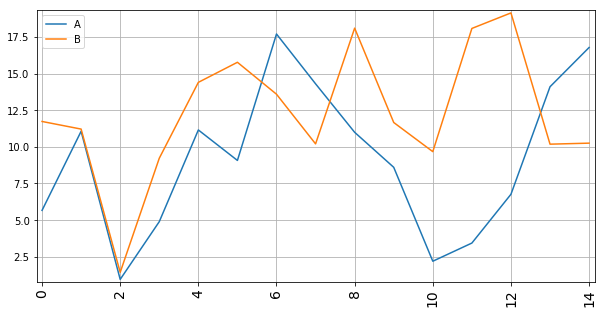

In [8]:
import matplotlib.pyplot as plt

cummulativeRevenueA = data['ARPU_before_update']
cummulativeRevenueB = data['ARPU_after_update']


plt.figure(figsize=(10,5))
plt.xticks(fontsize=14, rotation='vertical')
plt.margins(0.01)
plt.grid(True)

# Строим график выручки группы А
plt.plot(data.index, data['ARPU_before_update'], label='A')

# Строим график выручки группы B
plt.plot(data.index, data['ARPU_after_update'], label='B')

plt.legend()

# Статистическая проверка данных

Учитывая малый размер выборки, а также тот факт, что мы оцениваем различия между двумя независимыми выборками, мы будем использовать критерий Манна-Уитни. Проверку статистической значимости мы будем выполнять с помощью библиотеки scipy.stats.

Для проверки нам необходимо указать p-value. В данном тесте считаю необходимым установить alpha = 0.5. P-value - это наименьшая величина уровня значимости, при которой нулевая гипотеза отвергается для данного значения статистики критерия. 

Формируем нулевую гипотезу: ARPU в группах А (до внесения изменений) и Б (после внесения изменений) равны.

In [9]:
import scipy.stats as stats

print('Нулевая гипотеза: ARPU в группах А и Б равны!')
print()
print('p-value = ', "{0:.3f}".format(stats.mannwhitneyu(data['ARPU_before_update'], data['ARPU_after_update'])[1]))
print()

alpha = 0.05
if ((stats.mannwhitneyu(data['ARPU_before_update'], data['ARPU_after_update'])[1]) < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Нулевая гипотеза: ARPU в группах А и Б равны!

p-value =  0.037

Отвергаем нулевую гипотезу


In [14]:

print()
print("{0:.3f}".format(data['ARPU_after_update'].mean()/data['ARPU_before_update'].mean()))
print()
print('Группа Б имеет прирост в конверсии.')


1.341

Группа Б имеет прирост в конверсии.


# Выводы:

     На основании проведенных статистических тестов можно утверждать, что апдейт был успешен, ARPU вырос.